**Author:** Oliver Shen

**Student Number:** 32805475

**Group Mmbers:** Stephanie Chow, Aamna Mushtaq, Sanchia Sehan, Oliver Shen

**Date:** 2024-11-09  

**Project:** Project Planning Stage (Individual) 

## (0)Preparations:
- Import packages and loading data 

In [1]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import os
import altair as alt
print("packages imported")

TypeError: _TypedDictMeta.__new__() got an unexpected keyword argument 'closed'

In [19]:
players = pd.read_csv("data/players.csv")
sessions = pd.read_csv("data/sessions.csv")

## (1)Data Description:

In [20]:
# Data header:
players.head(6)

,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
0,Pro,True,f6daba428a5e19a3d47574858c13550499be23603422e6...,30.3,Morgan,Male,9,NaN,NaN
1,Veteran,True,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa9397...,3.8,Christian,Male,17,NaN,NaN
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17,NaN,NaN
3,Amateur,True,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4f...,0.7,Flora,Female,21,NaN,NaN
4,Regular,True,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb...,0.1,Kylie,Male,21,NaN,NaN
5,Amateur,True,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee...,0.0,Adrian,Female,17,NaN,NaN


In [21]:
sessions.head(6)

,hashedEmail,start_time,end_time,original_start_time,original_end_time
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,30/06/2024 18:12,30/06/2024 18:24,1.719770e+12,1.719770e+12
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,17/06/2024 23:33,17/06/2024 23:46,1.718670e+12,1.718670e+12
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,25/07/2024 17:34,25/07/2024 17:57,1.721930e+12,1.721930e+12
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,25/07/2024 03:22,25/07/2024 03:58,1.721880e+12,1.721880e+12
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,25/05/2024 16:01,25/05/2024 16:12,1.716650e+12,1.716650e+12
5,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,23/06/2024 15:08,23/06/2024 17:10,1.719160e+12,1.719160e+12


### Dataset Summary

#### 1. `players.csv` Dataset
- **Number of Observations**: 196
- **Number of Variables**: 9
- **Variables**:
  
  | Variable          | Type     | Description |
  |-------------------|----------|-------------|
  | `experience`      | categorical   | Player's experience level categorized as one of (Beginner, Pro, Veteran, Amateur, Regular) |
  | `subscribe`       | Categorical/Boolean/Binary  | Indicates if the player has subscribed to news letter (True or False) |
  | `hashedEmail`     | N/A   | Unique Hashed identifier for each player (unique in each row) |
  | `played_hours`    | quantitative    | Total hours the player has spent playing on the server |
  | `name`            | N/A   | Player's in-game or display name (randomly assigned I think) |
  | `gender`          | categorical   | Gender of the player (e.g., Male, Female, Non-binary, Perfer not to say, others) |
  | `age`             | quantitative  | Age of the player |
  | `individualId`    | N/A    | Secondary identifier for each individual player (missing in most rows) |
  | `organizationName`| N/A    | Organization associated with the player (missing in most rows) |

- **Issues in Data**:
  - `individualId` and `organizationName` have a significant number of missing values.
  - Age and experience may be inaccurately self-reported, affecting the quality of these variables.
  - Data collection bias may exist if only certain types of players are more likely to participate (e.g., those who play more frequently or who are younger).
  
#### 2. `sessions.csv` Dataset
- **Number of Observations**: 1,535
- **Number of Variables**: 5
- **Variables**:

  | Variable             | Type   | Description |
  |----------------------|--------|-------------|
  | `hashedEmail`        | N/A | Unique Hashed identifier for each player (unique for each player) |
  | `start_time`         | quantitative | Start time of the session (in date-time format) |
  | `end_time`           | quantitative | End time of the session (in date-time format) |
  | `original_start_time`| quantitative  | Start time in different format? |
  | `original_end_time`  | quantitative  | End time in different format? |

- **Issues in Data**:
  - Nothing in paticualr, I need to compute each session length later by end_time - start_time

#### Overall Considerations

- **Exploratory Analysis**:
  - Some variables may need to be encoded or transformed before used further.


## (2) Question:

### Question chosen: 
Question 3: We would like to know something about our populations of users, in particular, we would like to have a good model of whether or not a player will continue contributing given past participation.

### Approach: 
Our main question focuses on understanding what factors influence a player’s likelihood to continue contributing to the server. To approach this, we plan to develop a model that predicts a player’s ongoing engagement based on their past activity. Specifically, I wll look at metrics such as the total number of sessions, the average session length, and the variability (standard deviation) of session length as indicators of consistent participation. By analyzing these metrics, we can measure a player's "likely future contributions" as response variables.

To build our predictive model, we’ll incorporate several additional explanatory variables, including the player’s experience level, subscription status, total hours played, gender, and age. Categorical variables, like experience and gender, will be converted to dummy variables to enable multi-covariate linear regression. This approach will allow us to examine the influence of each factor on continued contribution, giving us insights into the characteristics that best predict long-term engagement.

Perferably my linear regression model will look something like this: 

$Y = \beta_0 + \beta_1 x + (\gamma_0 + \gamma_1 x) x_1 + (\delta_0 + \delta_1 x)x_2 + \epsilon$

Where $x_i$s are dummy variables used to encode categorical variables, $x$ is the quantitative variable and  $\beta_i, \gamma_i, \delta_i$ are parameters for the linear model and $\epsilon$ is the error variable of normal disturbation centered at 0.


## (3) Exploratory Data Analysis and Visualization

**Step 1**:
- First compute the session_lenth for each session

In [22]:
sessions['start_time'] = pd.to_datetime(sessions['start_time'], format="%d/%m/%Y %H:%M")
sessions['end_time'] = pd.to_datetime(sessions['end_time'], format="%d/%m/%Y %H:%M")

sessions['session_length'] = (sessions['end_time'] - sessions['start_time']).dt.total_seconds() / 3600
sessions['original_session_length'] = (sessions['original_end_time'] - sessions['original_start_time'])

In [23]:
sessions.head()

,hashedEmail,start_time,end_time,original_start_time,original_end_time,session_length,original_session_length
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-06-30 18:12:00,2024-06-30 18:24:00,1.719770e+12,1.719770e+12,0.200000,0.0
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-06-17 23:33:00,2024-06-17 23:46:00,1.718670e+12,1.718670e+12,0.216667,0.0
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,2024-07-25 17:34:00,2024-07-25 17:57:00,1.721930e+12,1.721930e+12,0.383333,0.0
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-07-25 03:22:00,2024-07-25 03:58:00,1.721880e+12,1.721880e+12,0.600000,0.0
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-05-25 16:01:00,2024-05-25 16:12:00,1.716650e+12,1.716650e+12,0.183333,0.0


It seems the original_start_time and original_end_time contains identical time (in epoch format?) I will only be using session_length column to compute from here.

**Step 2**:
- Compute number_sessions, mean_session_length and sd_session_length for each player using hashedEmail as unique identifier

In [24]:
player_sessions = sessions.groupby('hashedEmail').agg(
    number_sessions=('session_length', 'size'), 
    mean_session_length=('session_length', 'mean'), 
    sd_session_length=('session_length', 'std') 
).reset_index()

player_sessions.head()

players_combined = pd.merge(players, player_sessions, on='hashedEmail', how='left')

players_combined.head()

,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,number_sessions,mean_session_length,sd_session_length
0,Pro,True,f6daba428a5e19a3d47574858c13550499be23603422e6...,30.3,Morgan,Male,9,NaN,NaN,27.0,1.246296,0.902162
1,Veteran,True,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa9397...,3.8,Christian,Male,17,NaN,NaN,3.0,1.416667,1.233671
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17,NaN,NaN,1.0,0.083333,NaN
3,Amateur,True,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4f...,0.7,Flora,Female,21,NaN,NaN,1.0,0.833333,NaN
4,Regular,True,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb...,0.1,Kylie,Male,21,NaN,NaN,1.0,0.150000,NaN


**Step 2**:
- Plot the histgram of the new columns to check for their disturbations

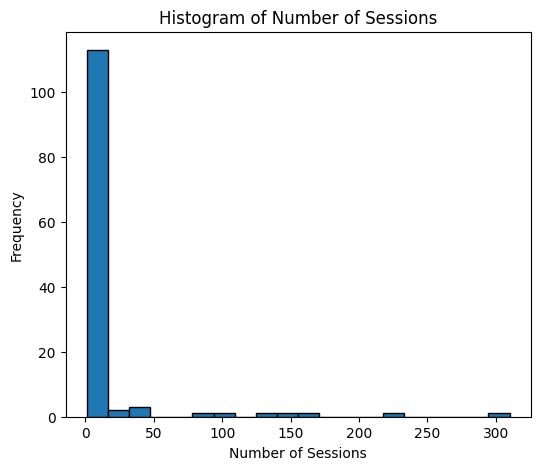

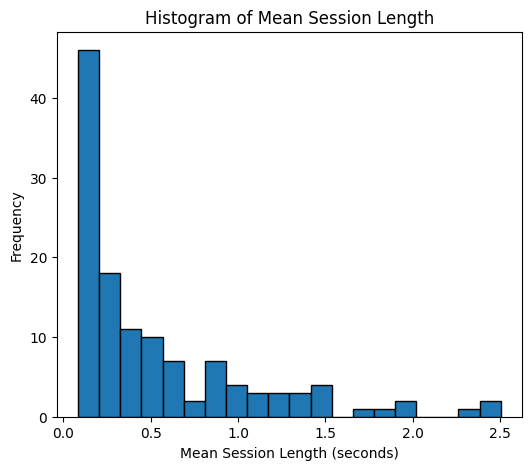

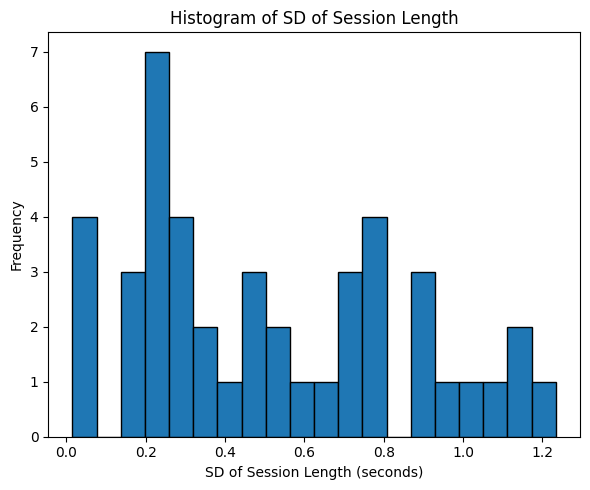

In [25]:
# Plot disturbation for number_sessions
plt.figure(figsize=(6, 5))
plt.hist(players_combined['number_sessions'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Number of Sessions')
plt.xlabel('Number of Sessions')
plt.ylabel('Frequency')
plt.show()
# Plot disturbation for number_sessions
plt.figure(figsize=(6, 5))
plt.hist(players_combined['mean_session_length'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Mean Session Length')
plt.xlabel('Mean Session Length (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 5))
plt.hist(players_combined['sd_session_length'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of SD of Session Length')
plt.xlabel('SD of Session Length (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Since so many players only have a single session, it would not make much sense to take SD into considerations.

**Step 3**:
- Make a scatter plot matrix and have response variables as y-axis and explanatory variables as x-axis

In [28]:
columns_to_plot = players_combined[["played_hours", "age"]]
rows_to_plot = players_combined[["number_sessions", "mean_session_length"]]

credit_pairplot = alt.Chart(players_combined).mark_point().encode(
    alt.X(alt.repeat("row"), type="quantitative"),
    alt.Y(alt.repeat("column"), type="quantitative"),
).properties(
    width=200,
    height=200
).repeat(
    column=rows_to_plot,
    row=columns_to_plot
)
credit_pairplot

alt.RepeatChart(...)

## (4) Methods and Plan

- Q: Why is this method appropriate?

- A: Using a linear regression with dummy variables allows us to model the relationship between a player’s engagement (session metrics) and multiple categorical and quantitative factors, such as experience level, subscription status, and age. This seems to be a good approach to take as many variables into considerations.
  
- Q: Which assumptions are required, if any, to apply the method selected?

- A: Since we are using a linear regression, all assumption of a linear regression should be required:
1. The average value of the error is 0 $\mathbb{E}(\epsilon_i) = 0$ for all $i$
2. The variance of the error is constant (homoscedasticity): $Var(\epsilon_i) = \sigma^2$ for all $i$.
3. The error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
4. The error is independent for each $\epsilon_i$ for all $i$.

- Q: What are the potential limitations or weaknesses of the method selected?

- A: We do not have sufficient evidence for assumption of linearity, this model may not capture complex relationships.
  
- Q: How are you going to compare and select the model?

- A: We will use RMSE to measure model performance.
  
- Q: How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

- A: We will split the data into a standard 70% training, 30% testing sets.
  